## URL extraction

In [27]:
import pandas as pd
import requests
import numpy as np 
from bs4 import BeautifulSoup
import re

data = pd.read_csv('sample_port.csv')

names = data['Scheme Name']



def check_url_for_404(url):
    try:
        response = requests.get(url)
        if response.status_code == 404:
            return True
        else:
            return False
    except requests.exceptions.RequestException as e:
        print("An error occurred:", e)
        return False

# Example usage

scheme_url = []
NAV_list = []

for name in names:
    name1 = name.lower().replace(' ','-').replace('---','-').replace('regular','direct')
    
    
    name2 = name1.replace('plan','growth')

    # remove the string after growth 
    name3 = name2.split('growth', 1)[0].replace('-direct-','-direct-growth').replace('--','-').replace('-idcw-reinvestment','')

    if 'fund-of-fund' in name3:
        name3 = name3.replace('fund-of-fund','fof')

    if name3.endswith('fund-'):
        name3 = name3.replace('fund-','fund-direct-growth')
    
    if name3.endswith('fund'):
        name3 = name3.replace('fund','fund-direct-growth')
    
    if name3.endswith('discovery-'):
        name3 = name3.replace('discovery-','discovery-fund-direct-growth')
    
    if name3=='icici-prudential-large-&-mid-cap-fund-direct-growth':
        name3 = 'icici-prudential-top-100-fund-direct-growth'
    
    if name3=='icici-prudential-bluechip-fund-direct-growth':
        name3 = 'icici-prudential-focused-bluechip-equity-fund-direct-growth' 
    
    if name3=='sbi-large-&-midcap-fund-direct-growth':
        name3 = 'sbi-magnum-multiplier-fund-direct-growth'

    if name3=='kotak-emerging-equity-fund':
        name3 = 'kotak-emerging-equity-scheme-direct-growth'

    if name3=='quant-small-cap-fund-direct-growth':
        name3 = 'quant-small-cap-fund-direct-plan-growth'

    if name3=='dsp-flexi-cap-fund-direct-growth':
        name3 = 'dsp-blackrock-equity-fund-direct-growth'

    if name3=='kotak-emerging-equity-fund-direct-growth':
        name3 = 'kotak-emerging-equity-scheme-direct-growth'

    if name3=='kotak-small-cap-fund-direct-growth':
        name3= 'kotak-midcap-fund-direct-growth'

    if name3=='templeton-india-equity-income-fund-direct-growth':
        name3 = 'templeton-india-equity-i-come-fund-direct-growth'

    if name3=='dsp-banking-&-financial-services-fund-direct-growth':
        name3 = 'dsp-banking-financial-services-fund-direct-growth'

    url = f"https://groww.in/mutual-funds/{name3}"
    print(url)
    is_404 = check_url_for_404(url)
    if is_404:
        print(name3)

        print(f"The URL {url} returns a 404 status code.")
    
    urldat = requests.get(url)

    soup = BeautifulSoup(urldat.text, 'html.parser')



    td_tag = soup.find_all('td',class_="fd12Cell contentPrimary bodyLargeHeavy")[0]

    # Extract the text content from the <td> tag
    value = td_tag.get_text(strip=True)

    NAV= re.search(r'₹([\d.]+)', value).group(1)

    NAV_list.append(NAV)
    scheme_url.append(url)

    #.split('-')[0].lower().replace(' ','-')[:-1])

data['scheme_url'] = np.array(scheme_url)
data['NAV'] = np.array(NAV_list)

data.to_csv('sample_port.csv',index=False)


https://groww.in/mutual-funds/quant-momentum-fund-direct-growth
https://groww.in/mutual-funds/hdfc-transportation-and-logistics-fund-direct-growth
https://groww.in/mutual-funds/quant-momentum-fund-direct-growth
https://groww.in/mutual-funds/axis-india-manufacturing-fund-direct-growth
https://groww.in/mutual-funds/icici-prudential-top-100-fund-direct-growth
https://groww.in/mutual-funds/quant-commodities-fund-direct-growth
https://groww.in/mutual-funds/kotak-healthcare-fund-direct-growth
https://groww.in/mutual-funds/hdfc-mid-cap-opportunities-fund-direct-growth
https://groww.in/mutual-funds/hdfc-technology-fund-direct-growth
https://groww.in/mutual-funds/icici-prudential-focused-bluechip-equity-fund-direct-growth
https://groww.in/mutual-funds/franklin-india-flexi-cap-fund-direct-growth
https://groww.in/mutual-funds/icici-prudential-multicap-fund-direct-growth
https://groww.in/mutual-funds/nippon-india-multi-cap-fund-direct-growth
https://groww.in/mutual-funds/groww-nifty-total-market-i

## Data 

In [1]:
import pandas as pd 

data = pd.read_csv('sample_port.csv')

columns_to_keep = ['Scheme Name', 'ISIN', 'Scheme Category Name', 'Units', 'NAV','scheme_url']

data = data[columns_to_keep]

data.to_csv('sample_port.csv',index=False)
data.head()

,Scheme Name,ISIN,Scheme Category Name,Units,NAV,scheme_url
0,quant Momentum Fund - Regular Plan IDCW - Rein...,INF966L01CY6,Equity - Diversified,3000.000,13.73,https://groww.in/mutual-funds/quant-momentum-f...
1,HDFC Transportation and Logistics Fund Regular...,INF179KC1GX4,Equity - Sector - Auto,1500.000,13.49,https://groww.in/mutual-funds/hdfc-transportat...
2,quant Momentum Fund - Regular Plan Growth - Gr...,INF966L01CW0,Equity - Diversified,7075.965,13.73,https://groww.in/mutual-funds/quant-momentum-f...
3,Axis India Manufacturing Fund Regular Growth,INF846K013S0,Equity - Diversified,3000.000,11.75,https://groww.in/mutual-funds/axis-india-manuf...
4,ICICI Prudential Large & Mid Cap Fund - Growth,INF109K01431,Equity - Diversified,220.345,924.99,https://groww.in/mutual-funds/icici-prudential...


In [13]:
url = requests.get(data.loc[data['Scheme Name'] == scheme,'scheme_url'].values[0])
soup = BeautifulSoup(url.text, 'html.parser')

# string between > and &
soup.find_all('title')[0].get_text().split('-')[0].strip()
# remove trailing space


'HDFC Mid Cap Opportunities Direct Plan Growth'

In [14]:
print(soup.prettify())

<!DOCTYPE html>
<html data-theme="light" lang="en" style="color-scheme:light">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, minimum-scale=1" name="viewport"/>
  <link href="/favicon32x32-groww.ico" rel="icon"/>
  <title>
   HDFC Mid Cap Opportunities Direct Plan Growth - NAV, Mutual Fund Performance &amp; Portfolio
  </title>
  <meta content="HDFC Mid Cap Opportunities Direct Plan Growth - Get latest NAV, SIP Returns &amp; Rankings, Ratings, Fund Performance, Portfolio, Expense Ratio, Holding Analysis, and Peers.
    Invest in HDFC Mid-Cap Opportunities Fund Online with Groww." name="description"/>
  <meta content="index" name="robots"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="https://groww.in/groww-logo-270.png" name="twitter:image"/>
  <meta content="HDFC Mid Cap Opportunities Direct Plan Growth - Get latest NAV, SIP Returns &amp; Rankings, Ratings, Fund Performance, Portfolio, Expense Ratio, Holding Anal

In [19]:
import json
# Find the script tag with the specific ID
script_tag = soup.find('script', id='__NEXT_DATA__')

# Extract the JSON data from the script tag content
json_data = json.loads(script_tag.contents[0])

# get holdings
json_data['props']['pageProps']['mf']['sub-category']



KeyError: 'sub-category'

## Data get the holding

In [2]:
import requests
from bs4 import BeautifulSoup
import json


data = pd.read_csv('sample_port.csv')
all_schemes = data['Scheme Name'].unique()

consol_df = pd.DataFrame()
for scheme in all_schemes:
        url = requests.get(data.loc[data['Scheme Name'] == scheme,'scheme_url'].values[0])
        soup = BeautifulSoup(url.text, 'html.parser')

        # Find the script tag with the specific ID
        script_tag = soup.find('script', id='__NEXT_DATA__')

        # Extract the JSON data from the script tag content
        json_data = json.loads(script_tag.contents[0])

        # get holdings
        holdings = json_data['props']['pageProps']['mf']['holdings']

        # get pandas
        hold_df = pd.DataFrame(holdings)
        
        # hold_df = hold_df[['company_name','sector_name','corpus_per']]

        consol_df = pd.concat([hold_df, consol_df], ignore_index=True)

consol_df = consol_df[['company_name','sector_name','corpus_per']]


KeyboardInterrupt: 

In [7]:
print(holdings)

[{'scheme_code': '152202', 'portfolio_date': '2024-02-29T00:00:00.570Z', 'company_name': 'Sun Pharmaceutical Industries Ltd.', 'nature_name': 'EQ', 'sector_name': 'Healthcare', 'instrument_name': 'Equity', 'rating': None, 'market_value': 247.773969, 'corpus_per': 6.07418409, 'market_cap': None, 'rating_market_cap': None, 'stock_search_id': 'sun-pharmaceutical-industries-ltd'}, {'scheme_code': '152202', 'portfolio_date': '2024-02-29T00:00:00.570Z', 'company_name': 'Tata Motors Ltd.', 'nature_name': 'EQ', 'sector_name': 'Automobile', 'instrument_name': 'Equity', 'rating': None, 'market_value': 240.4006, 'corpus_per': 5.89342579, 'market_cap': None, 'rating_market_cap': None, 'stock_search_id': 'tata-motors-ltd'}, {'scheme_code': '152202', 'portfolio_date': '2024-02-29T00:00:00.570Z', 'company_name': 'Mahindra & Mahindra Ltd.', 'nature_name': 'EQ', 'sector_name': 'Automobile', 'instrument_name': 'Equity', 'rating': None, 'market_value': 235.7528, 'corpus_per': 5.77948488, 'market_cap': No

In [74]:
import plotly.express as px
import altair as alt 

# Calculate counts of each category
category_counts = data['Scheme Category Name'].value_counts()

# Create a pie chart
fig = px.pie(values=category_counts.values, names=category_counts.index, title='Pie Chart of Categories')


fig.show()

In [76]:

# Calculate counts of each category
# category_counts = df['category'].value_counts().reset_index()

# Rename columns for clarity
category_counts = data['Scheme Category Name'].value_counts().reset_index()
# Rename columns for clarity
category_counts.columns = ['category', 'count']
alt.Chart(category_counts).mark_arc(innerRadius=50).encode(
    theta="count",
    color="category:N",
)

alt.Chart(...)

In [53]:
import pandas as pd

consol_df = pd.read_csv('./consol_holdings.csv')



In [32]:
import pandas as pd
import numpy as np
import altair as alt

scheme1 = consol_df['Scheme Name'].unique()[0]
scheme2 = consol_df['Scheme Name'].unique()[1]

portfolio1 = consol_df.loc[consol_df['Scheme Name'] == scheme1,['Scheme Name','sector_name','company_name','corpus_per']]
# portfolio1.set_index('company_name',inplace=True)

portfolio2 = consol_df.loc[consol_df['Scheme Name'] == scheme2,['Scheme Name','sector_name','company_name','corpus_per']]

# # sum the corpus_per column for unique sector names
# portfolio2 = portfolio2.groupby('sector_name')['corpus_per'].sum().reset_index()

# portfolio2.set_index('sector_name',inplace=True)

# # sum the corpus_per column for unique sector names
# portfolio1 = portfolio2.groupby('sector_name')['corpus_per'].sum().reset_index()

# portfolio1.set_index('sector_name',inplace=True)


In [65]:
import pandas as pd
import numpy as np
import altair as alt

alt.themes.enable('dark')

consol_df = pd.read_csv('./consol_holdings.csv')
consol_df.columns = ['Scheme Name','Scheme Category', 'Company', 'Sector Name', 'Percent Contribution', 'NAV', 'Units']

scheme1 = consol_df['Scheme Name'].unique()[3]
scheme2 = consol_df['Scheme Name'].unique()[4]

portfolio1 = consol_df.loc[consol_df['Scheme Name'] == scheme1,['Scheme Name','Sector Name','Company','Percent Contribution']]
# portfolio1.set_index('company_name',inplace=True)

portfolio2 = consol_df.loc[consol_df['Scheme Name'] == scheme2,['Scheme Name','Sector Name','Company','Percent Contribution']]

df = pd.concat([portfolio1, portfolio2], axis=0)


# Group by scheme_name and sector, aggregate contribution and unique company names
df_grouped = df.groupby(['Scheme Name', 'Sector Name']).agg({
    'Percent Contribution': 'sum',
    'Company': lambda x: ', '.join(set(x))
}).reset_index()

color_scheme = 'category10'  # You can change the color scheme as needed

# Create the Altair chart
chart = alt.Chart(df_grouped).mark_bar().encode(
    x='Sector Name:N',
    y='sum(Percent Contribution):Q',
    color='Scheme Name:N',
    tooltip=['Sector Name:N', 'Company:N'],
    xOffset=alt.XOffset("Scheme Name:N")
).properties(
    title='Sectorwise Contribution of Schemes',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14,
    grid=False
).configure_legend(
    labelFontSize=12
)


# Display the chart
chart.show()


alt.Chart(...)

In [3]:
from mftool import Mftool
mf = Mftool()

mf.get_scheme_quote('118989')



{'scheme_code': '118989',
 'scheme_name': 'HDFC Mid-Cap Opportunities Fund - Growth Option - Direct Plan',
 'last_updated': '25-Apr-2024',
 'nav': '175.875'}

In [10]:
import requests
from bs4 import BeautifulSoup
import json
from mftool import Mftool
mf = Mftool()

scheme_url= 'https://groww.in/mutual-funds/quant-momentum-fund-direct-growth'
url = requests.get(scheme_url)
# scrape url
soup = BeautifulSoup(url.text, 'html.parser')

# Find the script tag with the specific ID
script_tag = soup.find('script', id='__NEXT_DATA__')
# Extract the JSON data from the script tag content
json_data = json.loads(script_tag.contents[0])
# get holdings
scheme_code = json_data['props']['pageProps']['mf']['scheme_code']

data = mf.get_scheme_historical_nav(scheme_code,as_Dataframe=True)

<Axes: xlabel='date'>

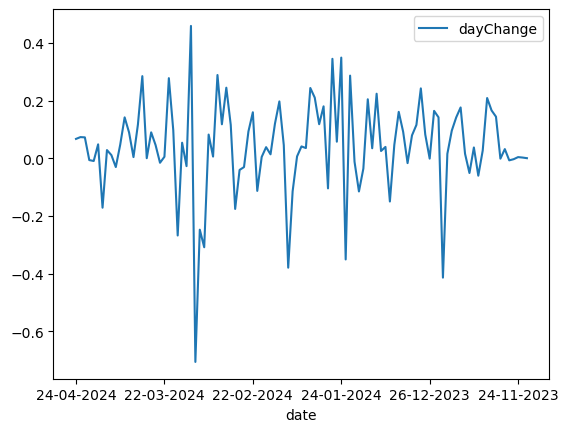

In [11]:
data.plot()

In [5]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd 


data_scheme = pd.read_csv('https://www.amfiindia.com/spages/NAVAll.TXT',delimiter=';')
data_scheme.dropna(inplace=True)



In [8]:
data

,Scheme Code,ISIN Div Payout/ ISIN Growth,ISIN Div Reinvestment,Scheme Name,Net Asset Value,Date
2,119551,INF209KA12Z1,INF209KA13Z9,Aditya Birla Sun Life Banking & PSU Debt Fund ...,102.9593,26-Apr-2024
3,119552,INF209K01YM2,-,Aditya Birla Sun Life Banking & PSU Debt Fund ...,114.5338,26-Apr-2024
4,119553,INF209K01YO8,-,Aditya Birla Sun Life Banking & PSU Debt Fund ...,111.9713,26-Apr-2024
5,108272,INF209K01LX6,INF209KA11Z3,Aditya Birla Sun Life Banking & PSU Debt Fund ...,145.2473,26-Apr-2024
6,110282,INF209K01LU2,-,Aditya Birla Sun Life Banking & PSU Debt Fund ...,110.881,26-Apr-2024
...,...,...,...,...,...,...
14210,109618,INF789F01GU3,INF789F01GV1,UTI Quarterly Interval Fund - II - Regular Pla...,10.6631,26-Apr-2024
14211,121722,INF789F01WU0,-,UTI Quarterly Interval Fund - III -Direct Plan...,29.4163,26-Apr-2024
14212,121721,INF789F01WS4,INF789F01WT2,UTI Quarterly Interval Fund - III -Direct Plan...,10.7462,26-Apr-2024
14213,110024,INF789F01HC9,-,UTI Quarterly Interval Fund - III -Regular Pla...,28.7898,26-Apr-2024
